In [1]:
import os
import tarfile
from six.moves import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def housing_path_read(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)


In [4]:
housing=housing_path_read()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#The total_bedrooms has just 20433 non-null values and som 207 districts are missing, here each row represents a district .

#The ocean_proximity is an object type feature and here we can find its count in each category by using

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


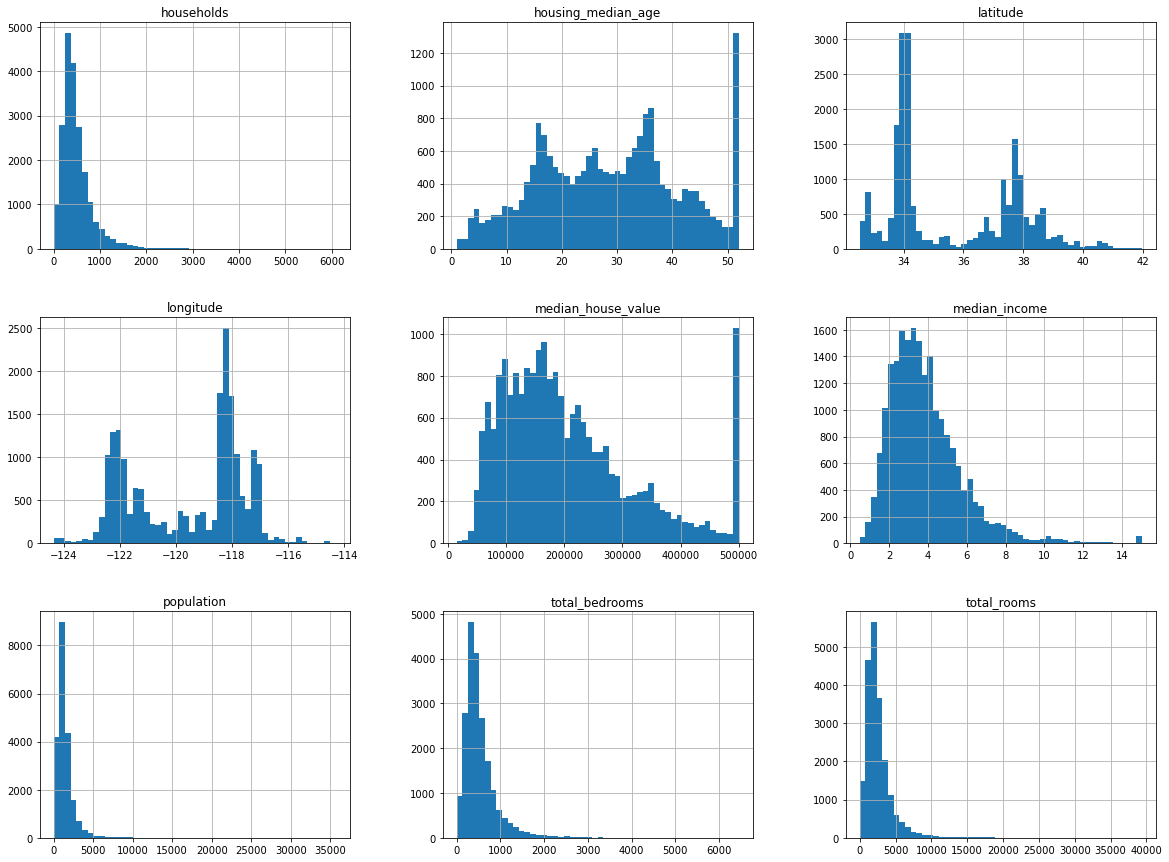

In [9]:
#Some insights we can have is that about 25% of the housing_median_age have value less than 18, 50% have a value less than 29 
# and 75% have a value lesser than 37, these are nothing but 1st quartile (25th percentile), median and 2nd quartile(75th percentile)


import matplotlib.pyplot as plt;
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
#Some insights that we can get from the above hist plot is that median income is first not expressed in USD so we can check with the 
#proper team to understand and its understood that its scaled and capped at 15. Likewise the housing median age and median_house value
# are also capped and since the latter is the output label we need to make sure that the labels are proper for the values capped,
#or to ensure that our model works fine we need to remove the districts for the values capped.



In [11]:
#Creating test data set using scikit learn which provides the funstion test_train_split and we can also use test_size=0.2 and also
# and random_state for seed.

from sklearn.model_selection import train_test_split;
train_data, test_data=train_test_split(housing, test_size=0.2, random_state=42)




In [12]:
#Always ensure that test set is representative of the whole data set if the data is non-representative of the data then it will introduce
# sampling bias and hence we need to stratify the data to ensure that the data is relevant to the whole data set

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

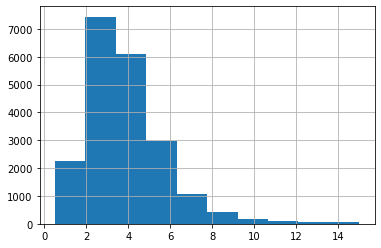

In [13]:
housing["median_income"].hist()
housing["median_income"].value_counts()

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

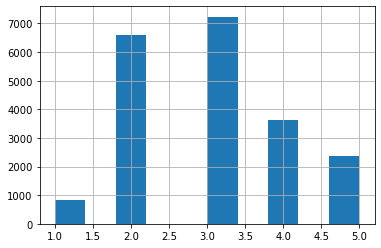

In [14]:
#Creating a stratified data by dividding the median income by 1.5 and rounding off and also merging values above 5
import numpy as np
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

housing["income_cat"].hist()
housing["income_cat"].value_counts()/len(housing)


In [15]:
#Before stratified sampling/shuffling lets look at the income_cat count

housing["income_cat"].value_counts()
len(housing)

#Stratified sampling
#importing the module
#Here we are interested in only one split
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#Based on split we are going to seperate our housing and housing["income_cat"] 
#into two indices

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_data=housing.loc[train_index]
    strat_test_data=housing.loc[test_index]

#Now the stratified sampling has been done, next step is to check the income category after stratification.

housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [16]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [17]:
strat_test_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND,2.0
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN,2.0
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN,4.0
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND,4.0


In [18]:
#removing income_cat attribute as it has generated the test set and its no longer needed
for i in(strat_train_data,strat_test_data):
    i.drop("income_cat",axis=1, inplace=True)
    



In [19]:
#strat_train_data
strat_train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [20]:
#Visualize the data in training set more accurately

housing_data=strat_train_data.copy()
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


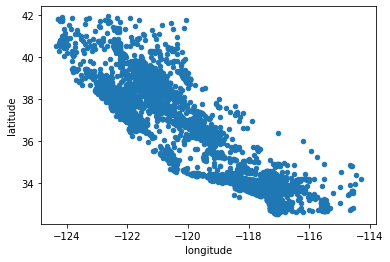

In [21]:
housing_data.plot(kind="scatter",x="longitude",y="latitude")

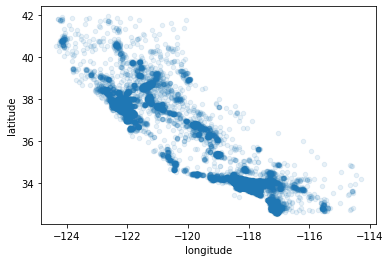

In [22]:
#Visualize high density areas better by using alpha value

housing_data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

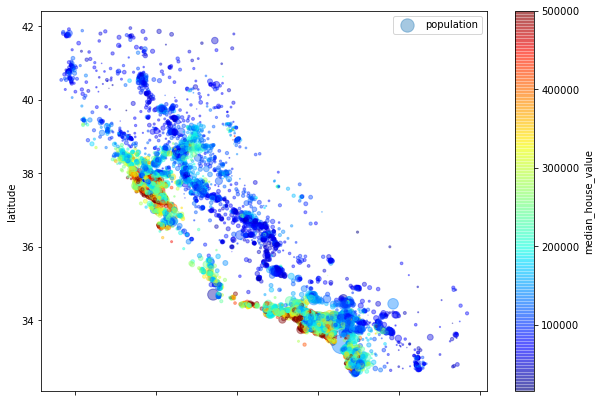

In [23]:
housing_data.plot(kind="scatter",x="longitude",y="latitude", alpha=0.4, s=housing_data["population"]/100,label="population",figsize=(10,7),
                 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
                 )
plt.legend()

In [24]:
#To find out the correlation between various attributes use corr() functions

corr_matrix=housing_data.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)
import pandas

#From the data below we can observe that values that re close 1 like for median income have a strong positive corelation between the 
#housing prices and those that are close to -1 have a negative relation with output.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000166851B0190>,
      dtype=object)

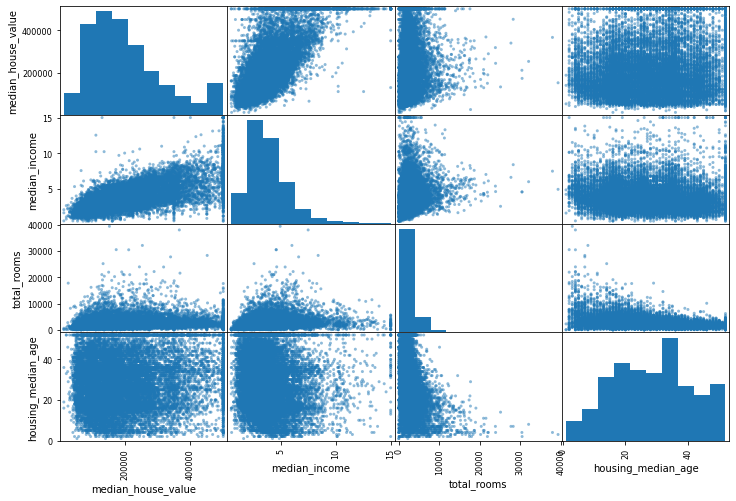

In [25]:
#Pearson corelation coefficient doesnt take into account non-linear relationships hence we can use scatter_mtrix

from pandas.plotting import scatter_matrix

Features=["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(housing_data[Features],figsize=(12,8))

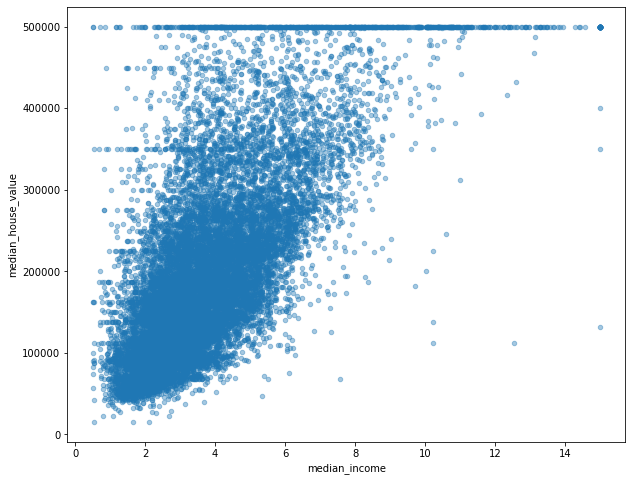

In [26]:
#IF each feature is plotted against the same generally we would obtain a straight line but in this case we get a histogram plotted.

housing_data.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.4,figsize=(10,8))

In [27]:
#From the above plot its visible that there is a data capping at income 50000$, 450000,350000 and also 280000 these data quirks
#should be avoided and they can be removed to prevent the ML algorithm from learning on this

#Feature combination is highly useful for predicting the house prices lets combine the total room, total bedrooms and population as 
#combination of other

housing["total_rooms_household"]=housing["total_rooms"]/housing["households"]
housing["total_bedrooms_perrooms"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_perhousehold"]=housing["population"]/housing["households"]

In [28]:
#Use the correlation matrix again
new_corr_matrix=housing.corr()
new_corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.688075
income_cat                 0.643892
total_rooms_household      0.151948
total_rooms                0.134153
housing_median_age         0.105623
households                 0.065843
total_bedrooms             0.049686
population_perhousehold   -0.023737
population                -0.024650
longitude                 -0.045967
latitude                  -0.144160
total_bedrooms_perrooms   -0.255880
Name: median_house_value, dtype: float64

In [29]:
#The above is more useful than the normal attributes.

#Preparing the data for machine learning algorithm, in order to prevent the target values/labels from getting
#affected lets seperate them

housing_new=strat_train_data.drop("median_house_value",axis=1)
housing_labels=strat_train_data["median_house_value"].copy();

#as you can see the new housing data consists of all cols except the target value

In [30]:
housing_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [31]:
#When there are missing feature values the algorithm might not wrk well so its better to clean it up.
#option 1 get rid of corresponding district values or whole attribute or fill them with zeroes/median/mean

#option1 
#housing_new.dropna(subset=["total_bedrooms"])
#option 2
#housing_new.drop("total_bedrooms",axis=1)
#option 3
#median=housing_new["total_bedrooms"].median()
#housing_new["total_bedrooms"].fillna(median,inplace=True)

from sklearn.impute import SimpleImputer
#This imputer directly computes the median of each attribute and stores in statistics col
#we can simply take this to fill up the missing values in each col

imputer=SimpleImputer(missing_values=np.nan,strategy="median")

#median can be computed only on numeric values so drop text ocean_proximity

housing_num=housing_new.drop("ocean_proximity",axis=1)

imputer.fit(housing_num)
imputer.statistics_


array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [32]:
#The imputer has computed the median of each of the 8 attributes and now we can apply this to the original housing dataset with missing
#values

X=imputer.transform(housing_num)
X
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [33]:
#The text attribute is left out because its not numeric but we can utilize the same as a numerical one using label encoder

from sklearn.preprocessing import LabelEncoder

Encoder=LabelEncoder();
housing_cat=housing_new["ocean_proximity"]
#Apply the label to ocean proximity

housing_cat_encode=Encoder.fit_transform(housing_cat)

print(housing_cat_encode)
#Now its converted to numeric values and the corresponding text attribute is found in encoder.classes_

print(Encoder.classes_)

#By default the ML algorithm thinks that the nearby values are more similar like 0 and 4 are similar but 0 and 1 are not that similar
#for this purpose we need something called one hot encoder that assigns one binary attribute per category for example
#here whenever ocean appears we will have 1 otherwise 0 and likewise inlan will have 1 and otherwise 0

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

#The fit transform method here will accept only 2d array

housing_encode_new=encoder.fit_transform(housing_cat_encode.reshape(-1,1))

housing_encode_new


[0 0 4 ... 1 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [34]:
#The resultant is a sparse matrix which stores one binary attribute per cat and the rest are all zeroes but
#It doesn't occupy all the memory spaces for storing zeroes instead it stores just the index of zero values

housing_encode_new.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [35]:
#In order to convert text attribute to categorical attribute and then to a sparse matrix in one shot use LabelBinarizer

from sklearn.preprocessing import LabelBinarizer
sparse_encoder=LabelBinarizer()

housing_sparse=sparse_encoder.fit_transform(housing_cat)

housing_sparse

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [36]:
# custom transformers are useful if we want to do custom cleanup of data or combining specific attributes into one.

#from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
#rooms_ix, bedrooms_ix, population_ix, household_ix = [
    #list(housing.columns).index(col)
    #for col in ("total_rooms", "total_bedrooms", "population", "households")]

#class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 #   def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
  #      self.add_bedrooms_per_room = add_bedrooms_per_room
   # def fit(self, X, y=None):
    #    return self  # nothing else to do
    #def transform(self, X, y=None):
     #   rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
      #  population_per_household = X[:, population_ix] / X[:, household_ix]
       # if self.add_bedrooms_per_room:
        #    bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
         #   return np.c_[X, rooms_per_household, population_per_household,
          #               bedrooms_per_room]
        #else:
         #   return np.c_[X, rooms_per_household, population_per_household]

#attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
#housing_extra_attribs = attr_adder.transform(housing.values)

#print(housing_extra_attribs)

In [37]:
#We can use pipeline to have a sequence of transformations 

#from sklearn.impute import SimpleImputer
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler

#num_pipeline=Pipeline([
 #   ('imputer',SimpleImputer(missing_values=np.nan,strategy="median")),
  #  ('attributes',CombinedAttributesAdder()),
   # ('standardization',StandardScaler()),
    # ])

#housing_tr=num_pipeline.fit_transform(housing_num)

#print(type(housing_tr))


In [38]:
#Using custom transformer we would be converting our pandas dataframe directly to a numpy array before feeding to our imputer in the
#pipeline

#from sklearn.base import BaseEstimator, TransformerMixin

#class DataFrameTransformer(BaseEstimator, TransformerMixin):
 #   def __init__(self, attribute_names):
  #      self.attribute_names=attribute_names
   # def fit(self, X, y=None):
   #     return self
    #def transform(self, X):
     #   return X[self.attribute_names].values
    

#passing the values to the class

#num_attr=list(housing_num)
#cat_attr=["ocean_proximity"]

#num_pip=Pipeline([
#("Dataframeselection", DataFrameTransformer(num_attr)),
#("imputer", SimpleImputer(missing_values=np.nan,strategy="median")),
#("CombinFeature", CombinedAttributesAdder()),
#("Standardization", StandardScaler()),

#])

#cat_pipeline=Pipeline([
 #   ("Dataselection",DataFrameTransformer(cat_attr)),
  #  ("labelbinarizer",LabelBinarizer()),
#])

#housing_num.shape

#To combine both categroical and  numerical attributes

housing_new.shape

(16512, 9)

In [46]:
from sklearn.preprocessing import FunctionTransformer

rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing_new.values)

In [47]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing_new.columns)+["rooms_per_household", "population_per_household"],
    index=housing_new.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [49]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [50]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [51]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing_new)

In [52]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [53]:

housing_prepared.shape

(16512, 16)

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [55]:
#Now that we have made all the transformations on our data we need to predict the outcome using linear regression.

#Taking some training data and using it to predict outcome

some_data = housing_new.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [56]:
#comparing with original outputs

print("comparing with original", list(some_labels))

comparing with original [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [57]:
#Check the error rmse to understand how effective our model is:


from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_root = np.sqrt(lin_mse)
lin_root

68628.19819848923

In [58]:
#The error is quite significant our model tends to underfit data hence we need to improvise by including more features or we
#could use decision tree 

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [59]:
housing_prediction = tree.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_prediction)

tree_rmse = np.sqrt(tree_mse) 

tree_rmse

0.0

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)



In [61]:
def dispaly_scores(tree_rmse_scores):
    print("scores:",tree_rmse_scores)
    print("mean",tree_rmse_scores.mean())
    print("std",tree_rmse_scores.std())
    
    
dispaly_scores(tree_rmse_scores)

scores: [67640.47493409 67397.0259979  70718.75233854 69358.92333674
 69981.65617772 74081.44628219 71163.09766794 72189.48919766
 77383.81865107 70003.4101621 ]
mean 70991.80947459431
std 2841.8223897490666


In [62]:
scores_lin = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error",cv=10)

cv_rmsee = np.sqrt(-scores_lin)

def disp_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("std:",scores.std())
    
disp_scores(cv_rmsee)

scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean: 69052.46136345083
std: 2731.674001798344


In [64]:
#Lin and decision tree seem to underfit and overfit the data respectively lets try random forest

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

forest_reg_predictions = forest_reg.predict(housing_prepared)

forest_reg_mse = mean_squared_error(housing_labels, forest_reg_predictions)

forest_reg_rmse = np.sqrt(forest_reg_mse)
forest_reg_rmse



21933.31414779769

In [65]:
cross_rf = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",
                          cv=10)

cv_rmse = np.sqrt(-cross_rf)

disp_scores(cv_rmse)

scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
mean: 52583.72407377466
std: 2298.353351147122


In [77]:
#We can find the best possible combinations of hyperparameters by using gridsearchcv

from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators":[3,10,30],"max_features":[2,4,6,8]},
    {"bootstrap":[False],"n_estimators":[3,10],"max_features":[2,3,4]}
]

forest_reg = RandomForestRegressor(random_state=42)

grid_randomforest = GridSearchCV(forest_reg, param_grid, cv=5,
                                scoring = "neg_mean_squared_error")

grid_randomforest.fit(housing_prepared,housing_labels)

grid_randomforest.best_params_

{'max_features': 8, 'n_estimators': 30}

In [78]:
#best estimators (number of trees)

grid_randomforest.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [79]:
cv_res = grid_randomforest.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [81]:
#we can see that for the combination of n_Estimator =30 and max_features = 8 we get the best value of RMSE which is
# better than the default hyperparameter value

#Other methods for fine tuning involve ensemble and randomisedsearchCV 

print(num_attribs)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [85]:
feature_imp = grid_randomforest.best_estimator_.feature_importances_

feature_imp

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [95]:
extra_attr = ["rooms_per_household","population_per_household","bedrooms_per_rooms"]
text_attr = list(Encoder.classes_)

#combining extra , categorical and numerical features into one list

all_feature = num_attribs+extra_attr+text_attr

sorted(zip(feature_imp,all_feature), reverse = True)
#we can now eliminate the less useful features from the list


[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'population_per_household'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_household'),
 (0.053351077347675815, 'bedrooms_per_rooms'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

In [101]:
final_model = grid_randomforest.best_estimator_

#use the test set of data by seperating the target and the input features

x_test_data = strat_test_data.drop("median_house_value", axis=1)
y_test_data = strat_test_data["median_house_value"].copy()

x_final_data = full_pipeline.transform(x_test_data)

x_final_op = final_model.predict(x_final_data)

x_mse = mean_squared_error(y_test_data, x_final_op)

x_rmse = np.sqrt(x_mse)

x_rmse

47730.22690385927

In [ ]:
nhh